# Exercises Solutions for Frequentist Inference (6.-11.)

## Dorothea Müller

The following script is the solution the exercises for the frequentist inference section (ie. the exercises 6-11) of the course 'Statistics for Data Science' (WS 19/20) by Prof. Ostwald. The exercise sheets can be found at the website https://www.ewi-psy.fu-berlin.de/einrichtungen/arbeitsbereiche/computational_cogni_neurosc/teaching/Statistics_for_Data_Science_19_20.html.

## Configuration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import scipy.stats as stats
import seaborn as sns
from scipy.stats import t

%matplotlib inline

In [2]:
# For reproducibility, fix seed.
np.random.seed(42)

## 6. Foundations and Maximum Likelihood

### 1. Fisher scoring algorithm for the maximum likelihood estimation

**Analytical Results**

The linear regression has the form of 
$y = b^{T}x + \epsilon$ where the first element of the vector x is additionally added with a value of 1 to account for the intercept. The error is assumed to be distributed with \~N(0, $\sigma$). The regression can thus be rewritten as \~N(XW, $\sigma$). Expressed as a conditional probability density model, it becomes:

\begin{aligned}
p(y∣x,\theta)=(y∣μ(x),\sigma^{2}(x)).
\end{aligned}

Thus, taking the negative log-likelihood results in
\begin{aligned}
NL(\theta) &= -\sum_{i=1}^{n}log p(y_{i} | x_{i}, \theta) \\
\end{aligned}
Thus, $\hat{\beta} = (X^{T}X)^{-1}X^{T}y$

(See also https://medium.com/quick-code/maximum-likelihood-estimation-for-regression-65f9c99f815d and https://www.quantstart.com/articles/Maximum-Likelihood-Estimation-for-Linear-Regression for the derivation).

**Data Generation**

In [3]:
def generate_linear_relation(up_to, n, a, b):
    """
    Generates x, y with a linear relation y = a*x + b + Gaussian noise.
    
    Args:
        up_to: generates samples from 0 to up_to
        n: number of sampled datapoints
        a: slope
        b: intercept
        
    Returns:
        x, y
    """
    data = np.zeros(shape = (up_to, 2))
    for i, sample in enumerate(data):
        y = a * i + b + np.random.normal(0, 10)
        data[i, 0] = i
        data[i, 1] = y
    
    idx = np.random.choice(data.shape[0], n, replace = False)
    data = data[idx]
    
    return data[:, 0], data[:, 1]

In [4]:
# Parameters for generation y = a*x + b
np.random.seed(23)
upper = 100
n = 100
a = 1
b = 10
x, y = generate_linear_relation(upper, n, a, b)
X = np.vstack((x,y)).T

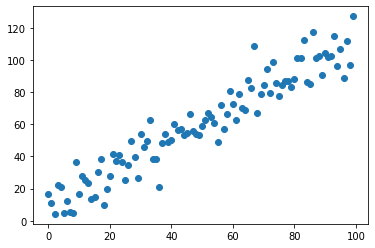

In [5]:
plt.scatter(x, y)

In [6]:
# Ground truth.
beta = np.linalg.inv(X.T@X)@X.T@y
beta.shape

(2,)

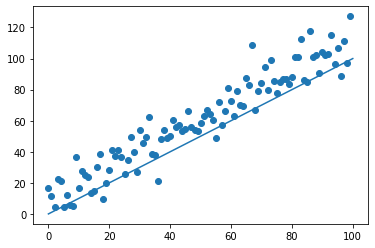

In [7]:
all_ = np.linspace(0, 100, 101)
plt.scatter(x, y)
plt.plot(all_, beta[1] * all_)

### Q: the intercept is not correctly calculated?

**Fisher Scoring Algorithm**

As this exercise is too hard (as discussed in the tutorial), I will abort it at this point (and delete the fruitless approaches I did here). 

### 2. Numerical Maximum Likelihood for Bernoulli Random Variables

The derivative for the log likelihood for the Bernoulli with $~B(\mu)$ is:

$ \frac{\delta} {\delta \mu} ln(x) = \frac{1}{\mu}\sum_{i}^{n}x_{i}-\frac{1}{1-\mu}(n-\sum_{i}^{n}x_{i})$

and the second derivative is:

$ \frac{\delta^{2}}{\delta \mu^{2}} ln(x) = -\frac{1}{\mu^{2}}\sum_{i}^{n}x_{i}-\frac{1}{(1-\mu)^{2}}(n-\sum_{i}^{n}x_{i})$.

For optimization, we will use the Newton-Raphson method.


In [8]:
def newton_raphson(data, n, theta):
    all_thetas = []
    all_thetas.append(theta) # Track initial condition.
    
    eps = 0.000001
    f_1 = lambda x : (1/(x+eps)) * np.sum(data) - 1/(1-(x+eps)) * (n - np.sum(data))
    f_2 = lambda x : -1/((x+eps)**2) * np.sum(data) - 1/((1-(x+eps))** 2) * (n - np.sum(data))
    
    stop = False
    
    while(not np.allclose(f_1(theta), 0, 0.0001)):
        
        theta = theta - f_1(theta)/f_2(theta)
        
        # Bound theta to be probability.
        if theta < 0:
            theta = 0.0
            stop = True
        elif theta > 1:
            theta = 1.0
            stop = True
            
        all_thetas.append(theta)
        if stop:
            break
    
    return all_thetas

In [9]:
n = 20
all_mu = [0.7, 1.0]

For mu: 0.7
Optimal parameter according to max. log likelihood: 0.75
Optimal parameter according to Newton-Raphson: 0.749999


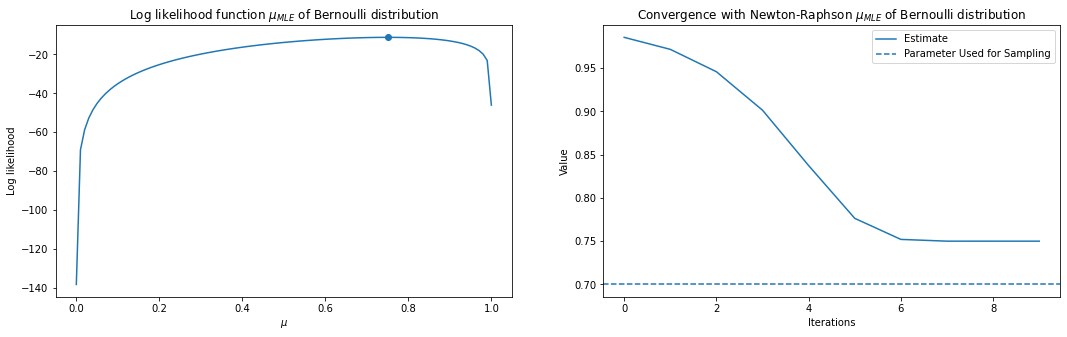

For mu: 1.0
Optimal parameter according to max. log likelihood: 1.0
Optimal parameter according to Newton-Raphson: 1.0


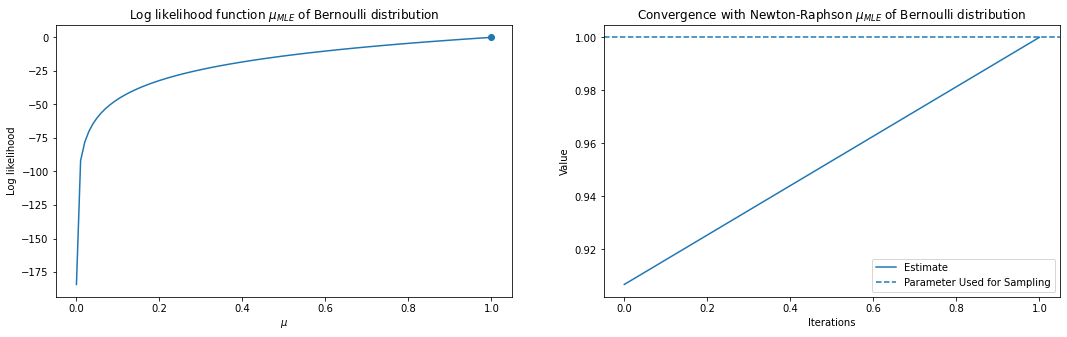

In [10]:
for mu in all_mu:
    sample = np.random.binomial(1, mu, n)
    
    # Likelihood estimation
    eps = 0.0001 #For not diving by 0.
    f = lambda x : np.log(x+eps) * np.sum(sample) + np.log(1-x+eps) * (n - np.sum(sample))
    thetas = np.linspace(0, 1, 101)
    
    # Newton-Raphson
    initial_theta = np.random.random()
    est_mu = newton_raphson(sample, n, initial_theta)
    
    # Plotting.
    fig, axs = plt.subplots(1, 2, figsize =(18, 5))
    
    axs[0].plot(thetas, f(thetas))
    axs[0].set_title("Log likelihood function $\mu_{MLE}$ of Bernoulli distribution")
    axs[0].set_xlabel("$\mu$")
    axs[0].set_ylabel("Log likelihood")
    theta_star = np.argmax(f(thetas))
    axs[0].scatter(np.array(theta_star/100), np.array(f(theta_star/100)))
    
    print(f"For mu: {mu}")
    print(f"Optimal parameter according to max. log likelihood: {theta_star/100}")
    print(f"Optimal parameter according to Newton-Raphson: {est_mu[-1]}")
    
    # Show convergence.
    axs[1].plot(est_mu, label = 'Estimate')
    axs[1].set_xlabel('Iterations')
    axs[1].set_ylabel('Value')
    axs[1].set_title('Convergence with Newton-Raphson $\mu_{MLE}$ of Bernoulli distribution')
    axs[1].axhline(mu, linestyle = 'dashed', label = 'Parameter Used for Sampling')
    axs[1].legend()
    plt.show();

**Interpretation**

The Newton-Raphson method converges to the maximum $\mu$ value of the log liklihood function.

### 3. Distribution of Maximum Likelihood Estimator

In [11]:
m_exp = 10000
n = 1000
thetas = np.linspace(0, 1, 101) # All possible estimates.
est = np.zeros(m_exp)
est_newton = np.zeros(m_exp)
mu = 0.7

In [12]:
for i in range(m_exp):
    sample = np.random.binomial(1, mu, n)
    
    # Likelihood estimation    
    mu_exp = np.argmax(f(thetas))/100
    est[i] = mu_exp
    
    est_newton[i] = newton_raphson(sample, n, initial_theta)[-1]

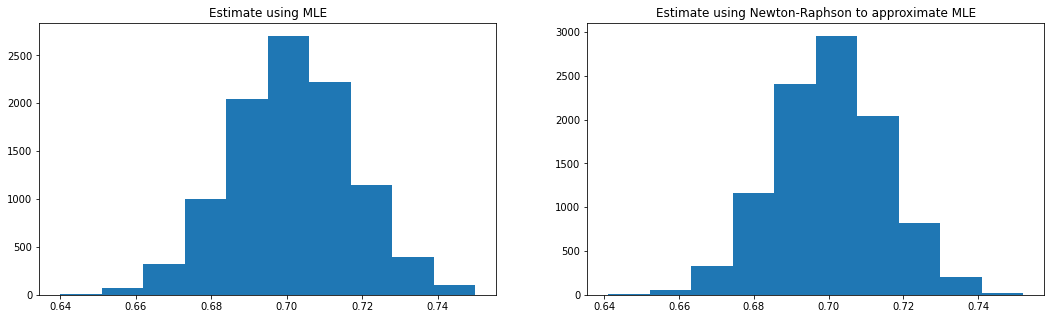

In [13]:
fig, axs = plt.subplots(1, 2, figsize = (18, 5))
axs[0].hist(est)
axs[0].set_title("Estimate using MLE")
axs[1].hist(est_newton)
axs[1].set_title("Estimate using Newton-Raphson to approximate MLE");

**Observation**

The MLE are normal distributed around the true parameter $\mu$ for both the direct MLE and the estimate using Newton-Raphson.

## 7. Finite-sample estimator

### 1. (Un-)biasedness for Normal Distribution

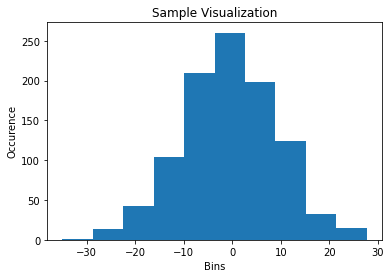

In [14]:
# True, usually unknown parameters.
n = 1000
mean_ = 0
std_dev = 10
var = std_dev ** 2
sample = np.random.normal(mean_, std_dev, n)

plt.hist(sample)
plt.title("Sample Visualization")
plt.xlabel("Bins")
plt.ylabel("Occurence");

In [15]:
# Calculation of the esimators using different samples.
all_means = np.zeros(n)
all_var = np.zeros(n)
all_std_dev = np.zeros(n)
all_mle_var = np.zeros(n)

for i in range(2, n):
    all_means[i] = np.mean(sample[:i])
    all_var[i] = np.var(sample[:i], ddof=1)
    all_std_dev[i] = np.std(sample[:i], ddof=1)
    all_mle_var[i] = np.var(sample[:i]) # no adjusted degree of freedom

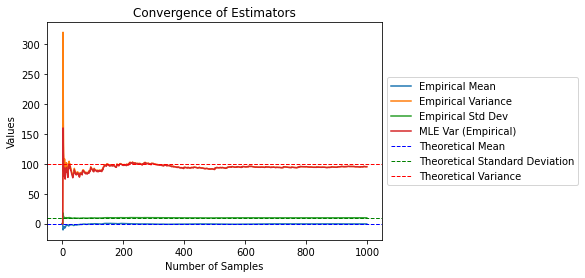

In [16]:
plt.plot(all_means, label = 'Empirical Mean')
plt.plot(all_var, label = 'Empirical Variance')
plt.plot(all_std_dev, label = 'Empirical Std Dev')
plt.plot(all_mle_var, label = 'MLE Var (Empirical)')
plt.xlabel("Number of Samples")
plt.ylabel("Values")
plt.axhline(mean_, color='blue', linestyle='dashed', linewidth=1, label = 'Theoretical Mean')
plt.axhline(std_dev, color = 'green', linestyle='dashed', linewidth=1, label = 'Theoretical Standard Deviation')
plt.axhline(var, color = 'red', linestyle='dashed', linewidth=1, label = 'Theoretical Variance')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f"Convergence of Estimators");

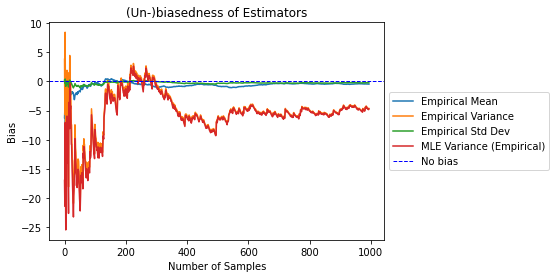

In [17]:
from_ = 5
plt.plot(all_means[from_:] - mean_, label = 'Empirical Mean')
plt.plot(all_var[from_:] - var, label = 'Empirical Variance')
plt.plot(all_std_dev[from_:] - std_dev, label = 'Empirical Std Dev')
plt.plot(all_mle_var[from_:] - var, label = 'MLE Variance (Empirical)')
plt.xlabel("Number of Samples")
plt.ylabel("Bias")
plt.axhline(0, color='blue', linestyle='dashed', linewidth=1, label = 'No bias')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f"(Un-)biasedness of Estimators");

In [18]:
print(f"Mean true: {mean_}, empirical: {all_means[-1]}\nVar true {var}, empirical {all_var[-1]}\n" \
      f"Std Dev true {std_dev}, empirical {all_std_dev[-1]}")

Mean true: 0, empirical: -0.46776751184663823
Var true 100, empirical 95.37432594192234
Std Dev true 10, empirical 9.765977981847099


**Observation**

We expected that there to be no bias for the mean and the sample variance (i.e. the expected value for the estimator equals the true parameter). The figure above shows that there is no bias for the mean. It also does not show a bias of the sample standard deviation although we expected to find a bias. The biasedness of the MLE variance parameter estimator can be shown (red).

### 2. (Un-)Biasedness for Binomial Distribution

In [19]:
# Using same procedure as above,
n = 1000
p = 0.7
mean_ = n * p
var = n * p * (1-p)
std_dev = np.sqrt(var)

sample = np.random.binomial(n, p, size=n)

In [20]:
# Calculation of the esimators using different samples.
all_means = np.zeros(n)
all_var = np.zeros(n)
all_std_dev = np.zeros(n)
all_mle_var = np.zeros(n)

for i in range(2, n):
    all_means[i] = np.mean(sample[:i])
    all_var[i] = np.var(sample[:i], ddof=1)
    all_std_dev[i] = np.std(sample[:i], ddof=1)
    all_mle_var[i] = (p*(1-p))/n

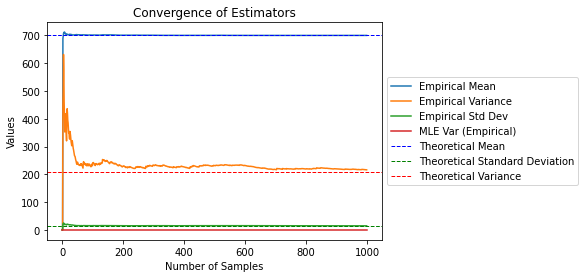

In [21]:
plt.plot(all_means, label = 'Empirical Mean')
plt.plot(all_var, label = 'Empirical Variance')
plt.plot(all_std_dev, label = 'Empirical Std Dev')
plt.plot(all_mle_var, label = 'MLE Var (Empirical)')
plt.xlabel("Number of Samples")
plt.ylabel("Values")
plt.axhline(mean_, color='blue', linestyle='dashed', linewidth=1, label = 'Theoretical Mean')
plt.axhline(std_dev, color = 'green', linestyle='dashed', linewidth=1, label = 'Theoretical Standard Deviation')
plt.axhline(var, color = 'red', linestyle='dashed', linewidth=1, label = 'Theoretical Variance')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f"Convergence of Estimators");

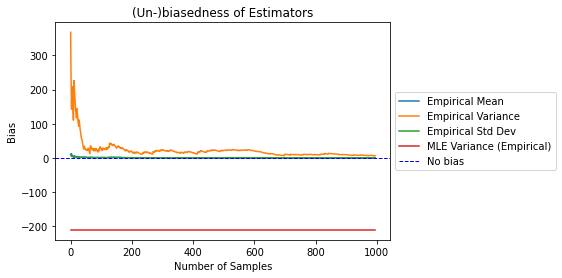

In [22]:
from_ = 5
plt.plot(all_means[from_:] - mean_, label = 'Empirical Mean')
plt.plot(all_var[from_:] - var, label = 'Empirical Variance')
plt.plot(all_std_dev[from_:] - std_dev, label = 'Empirical Std Dev')
plt.plot(all_mle_var[from_:] - var, label = 'MLE Variance (Empirical)')
plt.xlabel("Number of Samples")
plt.ylabel("Bias")
plt.axhline(0, color='blue', linestyle='dashed', linewidth=1, label = 'No bias')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title(f"(Un-)biasedness of Estimators");

**Observation:**

Same as in a).

### 3. Bias-variance decompositions

Bias-Variance Decomposition is
$MSE(\hat{\theta}_n) = B(\hat{\theta}_n)^2 + \mathbb{V}_{\theta}(\hat{\theta}_n)$ (see lecture) with
* $MSE(\theta_n) = \mathbb{E}_{\theta}((\hat{\theta}_n - \theta)^2)$
* $B$ bias
* $\mathbb{V}$ variance


In this exercise, $\theta_n$ is the estimator, successively, for $1/x * \sum_1^n(X_i - \bar{X}_n)^2$
* MLE of $\sigma$ where x = n
* sample variance where x = n-1
* special estimator where x = n+1 

In [23]:
def estimator(sample, x):
    return 1/x * np.sum((sample - np.mean(sample))**2)

def calc_MSE(est, true):
    return np.sum((est-true)**2)

def calc_bias(est, true):
    return est-true # Actually E(thetas), same question as below...

def calc_var(est):
    return 0

def decomposition(sample, est):
    
    var = np.var(est)

In [24]:
n = 100
mean_ = 0
var = 10
true_val = var
sample = random.normal(mean_, var, n)

In [25]:
factor_title = ["n", "n-1", "n+1"]
factor = [n, n-1, n+1]

for t, f in zip(factor_title, factor):
    print("Prefactor:", t)
    e = estimator(sample, f)
    mse = calc_MSE(e, true_val)
    
    # I am a little confused about the variance. If I only loop over one estimator,
    # then the variance is 0 because it is a scalar?
    var = calc_var(est)    
    bias = calc_bias(e, true_val)
    
    print(f"MSE[{mse:.2f}] = Bias^2[{bias**2:.2f}] + Variance[{var:.2f}]")
    print()

Prefactor: n
MSE[7333.38] = Bias^2[7333.38] + Variance[0.00]

Prefactor: n-1
MSE[7499.76] = Bias^2[7499.76] + Variance[0.00]

Prefactor: n+1
MSE[7172.10] = Bias^2[7172.10] + Variance[0.00]



## 8. Asymptotic Estimator Properties 

### 1. Showing that MLE of univariate Gaussian distribution & sample variance is asymptotically unbiased. 

In [26]:
def mle_var_gauss(n, sample):
    return 1/n * np.sum((sample - np.mean(sample))**2)

Show asymptotically unabiasedness, i.e. $lim_{n\to\inf}\mathbb{E}_{\theta}(\hat{\theta}_n) = \theta \forall \theta \in \mathbb{\theta}$, so choose different theta (different variances) and see whether the true value is reached if $n$ is great:

In [27]:
n_theta = 10
sample_size = 10000
var = np.random.uniform(100, size=n_theta)
mean_ = np.random.uniform(100, size=n_theta)

# sample = np.random.normal(mean_, np.sqrt(), n_theta)

for v, m in zip(var, mean_):
    sample = np.random.normal(m, np.sqrt(v), size=sample_size)
    mle_var = mle_var_gauss(sample_size, sample)
    
    print(f"true: {v:.3f}, est: {mle_var:.3f}")

true: 86.769, est: 86.517
true: 90.626, est: 90.303
true: 46.276, est: 47.219
true: 54.875, est: 55.116
true: 48.432, est: 49.262
true: 20.422, est: 20.251
true: 50.163, est: 50.177
true: 53.863, est: 52.850
true: 18.447, est: 18.559
true: 94.392, est: 94.790


**Observation**

We cannot simulate all $\theta \in \mathbb{\theta}$, but for all sampled $\theta$ the var MLE is the true theta. The estimator is unbiased in the large sample limit and is thus unbiased.

### 2. Asymptotic efficiency for Bernoulli MLE  

In [28]:
def mle_bernoulli(n, sample):
    """Return MLE for bernoulli distribution. See lecture 6 for derivation."""
    return 1/n * np.sum(sample)

def fisher_information_bernoulli(p):
    """Return fisher information of Bernoulli.
    Fisher information is the second derivative of the log likelihood estimator.
    For derivatin, see https://ocw.mit.edu/courses/mathematics/18-443-statistics-for-applications-fall-2006/lecture-notes/lecture3.pdf"""
    return 1/(p * (1-p))

In [29]:
def get_estimate(theta=0.5, n=1000):
    sample = np.random.binomial(n=1, size=n, p = theta) # Sample from Bernoulli distribution.
    mle_bern = mle_bernoulli(n, sample)
    return mle_bern

In [30]:
all_mle_bern = []
theta = 0.5
n = 1000
for i in range(100):
    mle_bern = get_estimate(theta, n)
    all_mle_bern.append(mle_bern)

In [31]:
exp_fisher_information = fisher_information_bernoulli(theta)

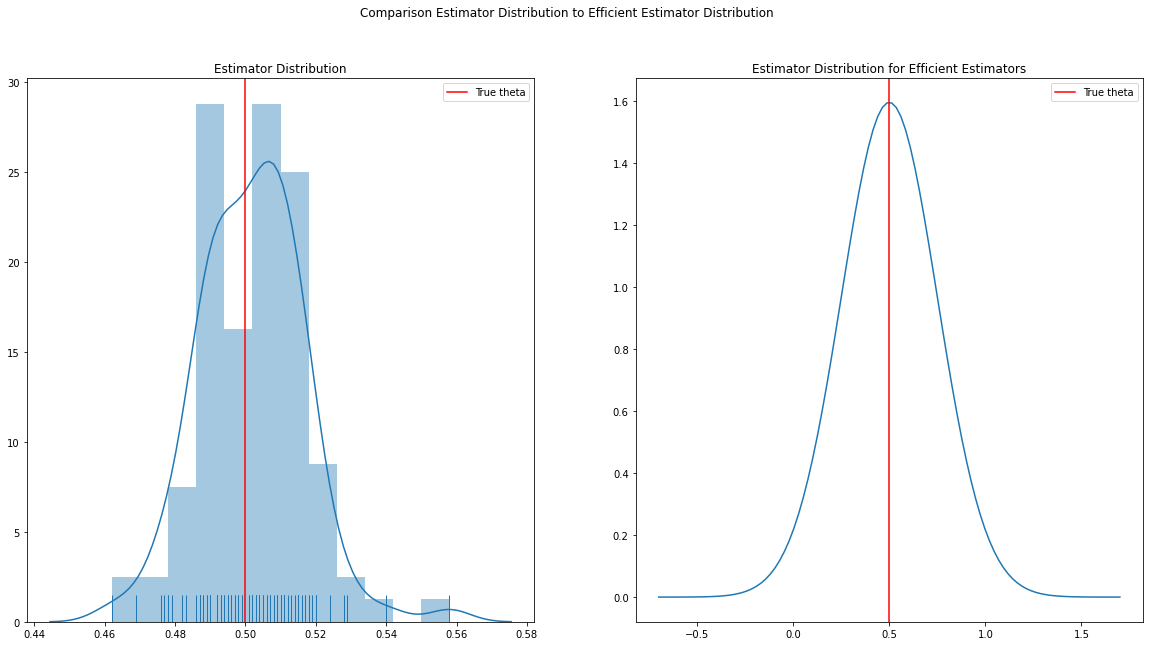

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

sns.distplot(all_mle_bern, kde=True, rug=True, ax=axs[0])
axs[0].set_title("Estimator Distribution")

lower_norm = theta - 0.3*exp_fisher_information
upper_norm = theta + 0.3*exp_fisher_information

x = np.linspace(lower_norm, upper_norm, 100)
axs[1].plot(x, stats.norm.pdf(x, theta, 1/exp_fisher_information))
axs[1].set_title("Estimator Distribution for Efficient Estimators")

for ax in axs:
    ax.axvline(theta, color='red', label='True theta')
    ax.legend()

plt.suptitle("Comparison Estimator Distribution to Efficient Estimator Distribution");

**Observations** 

An asymptotic efficient estimator is distributed according to $N(\theta, J(\theta)_n^{-1})$ with $\theta$ the parameter to be estimated and $ J(\theta)_n^{-1}$ the expected Fisher information of the sample.

The distribution of the simulated estimators looks like a normal distribution around the mean value of the true, parameter value that is estimated. However, I am not sure about the variance of the distribution as the inverse of the expected Fisher information leads to a slightly higher variance.

### 3. Asymptotic efficiency for MLE of variance of univariate Gaussian 

In [33]:
def mle_var_gaussian(n, sample):
    """Return MLE for var of a univariate Gaussian. See lecture 6 for derivation."""
    return 1/n * np.sum((sample - np.mean(sample)) ** 2)

def fisher_information_gaussian(var):
    """Return Fisher information of the univariate normal distribution.
    For derivation, see also http://proceedings.mlr.press/v70/chou17a/chou17a-supp.pdf.
    https://people.missouristate.edu/songfengzheng/Teaching/MTH541/Lecture%20notes/Fisher_info.pdf"""
    return 1/(var**2)

In [34]:
def get_estimate(mu_=0, var_= 10, n=1000):
    sample = np.random.normal(mu_, np.sqrt(var), n)
    mle_gaussian = mle_var_gaussian(n, sample)

    return mle_gaussian

In [35]:
all_mle_gauss = []
mu_ = 0
var = 10
n = 1000

for i in range(100):
    all_mle_gauss.append(get_estimate(mu_, var, n))

In [36]:
exp_fisher_information = fisher_information_gaussian(var) * n

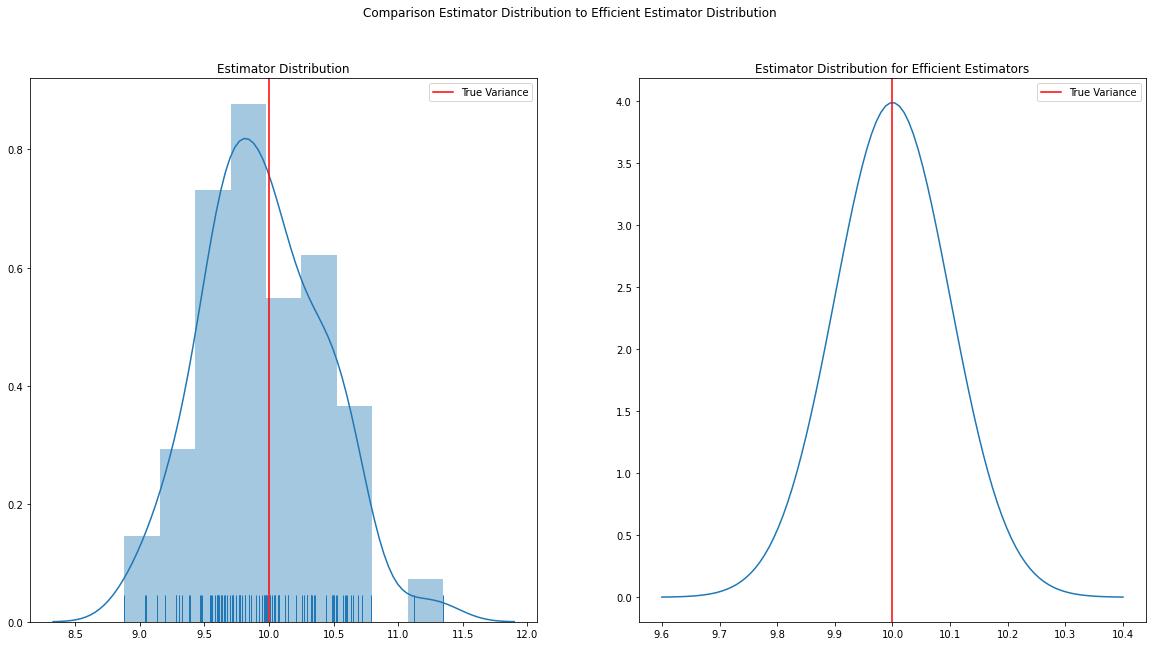

In [37]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

sns.distplot(all_mle_gauss, kde=True, rug=True, ax=axs[0])
axs[0].set_title("Estimator Distribution")

lower_norm = var - 4*1/exp_fisher_information
upper_norm = var + 4*1/exp_fisher_information

x = np.linspace(lower_norm, upper_norm, 100)
axs[1].plot(x, stats.norm.pdf(x, var, 1/exp_fisher_information))
axs[1].set_title("Estimator Distribution for Efficient Estimators")

for ax in axs:
    ax.axvline(var, color='red', label='True Variance')
    ax.legend()

plt.suptitle("Comparison Estimator Distribution to Efficient Estimator Distribution");

**Observations**

The MLE for the variance of a Gaussian distribution is an asymptotically efficient estimator.

## 9. Confidence Intervals

In [38]:
from scipy.stats import t

### 1. T-Statistic is distributed according to t-distribution with n-1 degree of freedom

In [39]:
def t_test_statistic(n, sample, mu):
    """Return standard two-sided t-test statistic, slides p.22 (14)."""
    return np.sqrt(n)/np.std(sample, ddof = 1)*(np.mean(sample)-mu)

In [40]:
n_samples = 10000
mu = 5
var = 10
n = 100
degree_freedom = n-1

all_t_stats = []
for s in range(n_samples):
    sample = np.random.normal(mu, np.sqrt(var), n)
    t_stat = t_test_statistic(n, sample, mu)
    all_t_stats.append(t_stat)

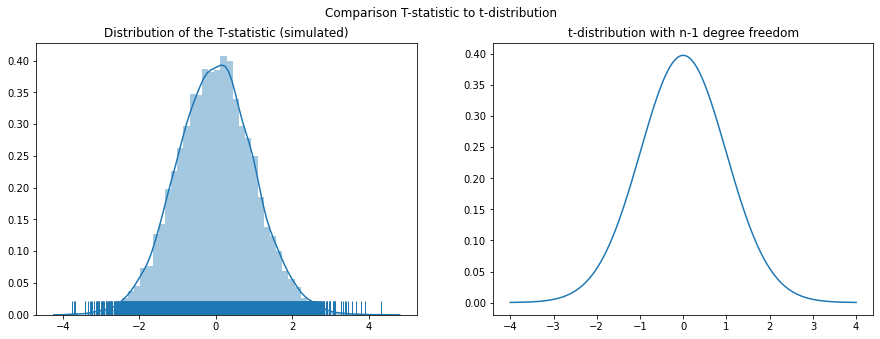

In [41]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

axs[0].set_title("Distribution of the T-statistic (simulated)")
sns.distplot(all_t_stats, kde=True, rug=True, ax=axs[0])

x = np.linspace(-4, 4, 1000)
axs[1].plot(x, t.pdf(x, degree_freedom))
axs[1].set_title("t-distribution with n-1 degree freedom")

plt.suptitle("Comparison T-statistic to t-distribution");

**Observation**

The distribution of the t-statistic (left) is similar to the t-distribution with n-1 degrees of freedom.

## 2. 95%-confidence interval for expectation parameter of Gaussian distribution

In [42]:
from scipy.special import ndtri # inverse function of the Gaussian

In [43]:
def confidence_interval_mu_gaussian(sample, n, var, delta):
    """Return confidence interval for expecatation parameter of a Gaussian"""
    est_mean = np.mean(sample)
    pre = np.sqrt(var)/np.sqrt(n)
    inv_cdf_val = ndtri((1+delta)/2)
    lower = est_mean - pre * inv_cdf_val
    upper = est_mean + pre * inv_cdf_val
    
    return lower, upper

In [44]:
def test_conf_mu_gaussian(true_mu = 10, true_var = 2):
    true_mu = 10
    true_var = 2
    n_samples = 1000
    sample_size = 1000
    delta = 0.95 # Confirming 95% confidence interval.

    all_is_in_interval = []

    for run in range(n_samples):
        sample = np.random.normal(true_mu, np.sqrt(true_var), sample_size)
        lower_c, upper_c = confidence_interval_mu_gaussian(sample, sample_size, true_var, delta)
        is_in_interval = lower_c < true_mu and true_mu < upper_c

        all_is_in_interval.append(is_in_interval)

    print(f"Using Gaussian with parameters mu={true_mu} and var={true_var}:")
    print(f"For delta-confidence interval with delta {delta}, \n{np.sum(all_is_in_interval)/n_samples} contain true parameter mu.")
    print()

In [45]:
mu = [2, 5, 10]
var = [1, 3, 2]

for m, v in zip(mu, var):
    test_conf_mu_gaussian(true_mu=m, true_var=v)

Using Gaussian with parameters mu=10 and var=2:
For delta-confidence interval with delta 0.95, 
0.941 contain true parameter mu.

Using Gaussian with parameters mu=10 and var=2:
For delta-confidence interval with delta 0.95, 
0.946 contain true parameter mu.

Using Gaussian with parameters mu=10 and var=2:
For delta-confidence interval with delta 0.95, 
0.964 contain true parameter mu.



**Observations**

The 95%-confidence interval for the expectation parameter of a Gaussian distribution with unknown variance could be verified to contain the true parameter in about 95% of the cases.

### 3. 95%-confidence interval expecation of Bernoulli distribution

In [46]:
def exp_bernoulli_interval(sample, n):
    """Return interval for 95%-confidence interval of expectation parameter of Bernoulli distribution."""
    mean_ml = np.mean(sample)
    i_ml = 1.96 * np.sqrt((mean_ml * (1-mean_ml)/n))
    lower = mean_ml - i_ml
    upper = mean_ml + i_ml
    
    return lower, upper

In [47]:
def run_config_bernoulli(p):
    p = 0.7
    sample_size = 1000
    n_runs = 1000
    is_in_range_all = []

    for n in range(n_runs):
        sample = np.random.binomial(n=1, size=sample_size, p=p)
        lower_c, upper_c = exp_bernoulli_interval(sample, sample_size)
        is_in_range = lower_c < p and p < upper_c
        is_in_range_all.append(is_in_range)

    print(f"For the expectation of a Bernoulli with mu = {p},\n {np.sum(is_in_range_all)/n_runs} of the samples contain true parameter.")
    print()

In [48]:
p = [0.2, 0.5, 0.7]

for p_ in p:
    run_config_bernoulli(p_)

For the expectation of a Bernoulli with mu = 0.7,
 0.951 of the samples contain true parameter.

For the expectation of a Bernoulli with mu = 0.7,
 0.958 of the samples contain true parameter.

For the expectation of a Bernoulli with mu = 0.7,
 0.952 of the samples contain true parameter.



**Observation**

95%-confidence simulated intervals of each configuration for the expectation parameter of a Bernoulli distribution comprise the true, but unknown expectation parameter.

## 10. Hypothesis Testing

### 1. Showing T-test = Exact Test

In [49]:
def t_test_statistic(n, sample, mu):
    """Return standard two-sided t-test statistic, slides p.22 (14)."""
    return np.sqrt(n)/np.var(sample, ddof = 1)*(np.mean(sample)-mu)

def test(t_x, c):
    """Use two-sided critical value-based test."""
    return int(np.abs(t_x) >= c)

def critical_value(alpha, n):
    """Return critical value using the chosen significance level and degrees of freedom n,
    slides p. 23 (16)."""
    return t.ppf(1-alpha/2, n-1)

In [50]:
def make_t_test():
    """Return whether null hypothesis has been rejected."""
    n = 10 # sample size
    mu = 10
    std_dev = 2

    # 1. Draw sample from normal distribution.
    sample = np.random.normal(mu, std_dev, n)
    # 2. Get test statistic.
    t_sample = t_test_statistic(n, sample, mu)
    # 3. Comparison to a' by choosing critical value.
    alpha = 0.05
    critical_val = critical_value(alpha, n)

    return test(t_sample, c_alpha_prime)

In [51]:
test_run = 1000
rejected = 0
for _ in range(test_run):
    rejected += make_t_test()
    
print("Type 1 error:", rejected/test_run)

NameError: name 'c_alpha_prime' is not defined

**Expectation:**

The size (i.e. the type 1 error of a test, rejecting the null hypothesis although the null hypothesis is true) is expected to be exact: This means that the chosen significance level a' should be (exactly) the same as the type 1 error in the simulation.
    
**Simulation Result:**

The size of the test is smaller than the chosen alpha level which would indicate that the test is conservative.

**Note:**

$T(X)$ (slides, formula 14) directly compares the sample to the $\mu$. It is quite interesting to look at the scipy implementation of the t-test; https://github.com/scipy/scipy/blob/v1.4.1/scipy/stats/stats.py#L5141-L5266. Next to checking for NaNs etc. also shows how it is done for two samples (with equal/unequal var being done separately) and also checking the tails in _ttest_finish. 

In [ ]:
#### Copied from scipy code; todo: replace

In [ ]:
def _unequal_var_ttest_denom(v1, n1, v2, n2):
    vn1 = v1 / n1
    vn2 = v2 / n2
    with np.errstate(divide='ignore', invalid='ignore'):
        df = (vn1 + vn2)**2 / (vn1**2 / (n1 - 1) + vn2**2 / (n2 - 1))

    # If df is undefined, variances are zero (assumes n1 > 0 & n2 > 0).
    # Hence it doesn't matter what df is as long as it's not NaN.
    df = np.where(np.isnan(df), 1, df)
    denom = np.sqrt(vn1 + vn2)
    return df, denom


def _equal_var_ttest_denom(v1, n1, v2, n2):
    df = n1 + n2 - 2.0
    svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df
    denom = np.sqrt(svar * (1.0 / n1 + 1.0 / n2))
    return df, denom

In [ ]:
def _ttest_ind_from_stats(mean1, mean2, denom, df):

    d = mean1 - mean2
    with np.errstate(divide='ignore', invalid='ignore'):
        t = np.divide(d, denom)
    t, prob = _ttest_finish(df, t)

    return (t, prob)

In [ ]:
def _ttest_finish(df, t):
    """Common code between all 3 t-test functions."""
    prob = distributions.t.sf(np.abs(t), df) * 2  # use np.abs to get upper tail
    if t.ndim == 0:
        t = t[()]

    return t, prob

In [ ]:
if equal_var:
    df, denom = _equal_var_ttest_denom(v1, n1, v2, n2)
else:
    df, denom = _unequal_var_ttest_denom(v1, n1, v2, n2)

res = _ttest_ind_from_stats(np.mean(a, axis), np.mean(b, axis), denom, df)

## 11. Nonparametric Inference

### 1. Histogram density estimator

In [52]:
def histogram_density_estimator(from_min, to_max, binwidth, data):
    """Return histogram density estimate with b."""

    bins = np.arange(from_min, to_max, binwidth)
    bin_ids = (sample - from_min)//binwidth

    unique, n_per_bin = np.unique(bin_ids, return_counts=True)
    
    counts = np.zeros(len(bins) + 1)
    for u, c in zip(unique, n_per_bin):
        counts[int(u)] = c
        
    est = 1/binwidth * (counts/len(data))
    return est

In [53]:
all_sample_sizes = [10, 50, 500, 1000]
all_hist_binwidth = [10, 5, 2, 1]

mu = 10
var = 4
hist_min = 0
hist_max = 20

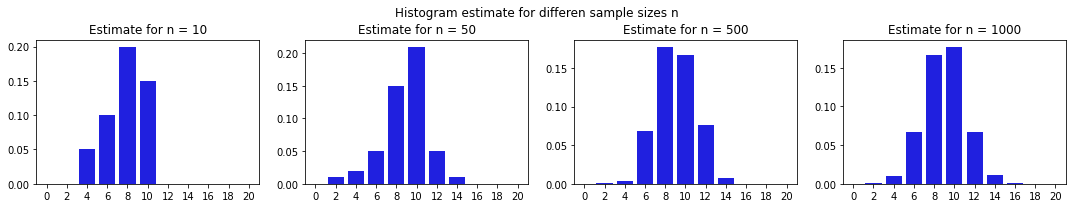

In [54]:
binwidth = 2

fig, axs = plt.subplots(1, len(all_sample_sizes), figsize = (15, 3))
for ax, sample_size in zip(axs, all_sample_sizes):
    sample = np.random.normal(mu, np.sqrt(var), sample_size)
    pdf = histogram_density_estimator(hist_min, hist_max, binwidth, sample)
    bins = np.arange(hist_min, hist_max+1, binwidth)
    sns.barplot(bins, pdf, ax = ax, color='blue')
    ax.set_title(f"Estimate for n = {sample_size}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Histogram estimate for differen sample sizes n");

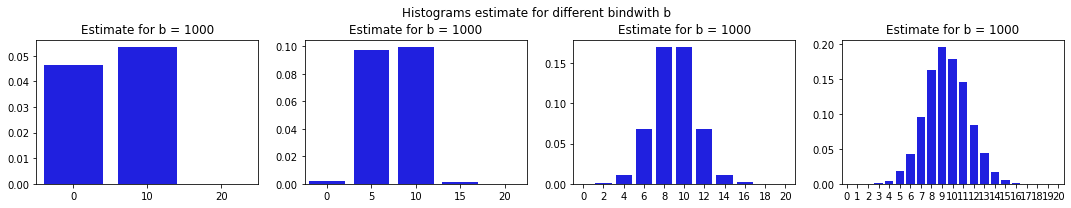

In [55]:
sample_size = 1000

fig, axs = plt.subplots(1, len(all_sample_sizes), figsize = (15, 3))
for ax, binwidth in zip(axs, all_hist_binwidth):
    sample = np.random.normal(mu, np.sqrt(var), sample_size)
    pdf = histogram_density_estimator(hist_min, hist_max, binwidth, sample)
    bins = np.arange(hist_min, hist_max+1, binwidth)
    sns.barplot(bins, pdf, ax = ax, color='blue')
    ax.set_title(f"Estimate for b = {sample_size}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle("Histograms estimate for different bindwith b");

**Observations**

The quality increases if the 1. sample size is bigger as the distribution converges to a normal distribution (see Histogram estimate for differen sample sizes n) and 2. when the bin size is smaller, the resolution of the distribution is more fine grained, thus also better (see Histograms estimate for different bindwith b).

### 2. Kernel-density estimator

In [56]:
def gauss_kernel(x, bandwidth):
    """Gaussian kernel, use for example kernel."""
    
    return 1/np.sqrt(2*np.pi) * np.e**(-x**2/(2*bandwidth**2))

In [57]:
def kernel_density_estimator(x, sample, bandwidth): # TODO: include kernel
    """Return density estimate using kernel function using smoothing parameter bandwidth."""
    n = len(sample)
    normalization = 1/(n*bandwidth)
    
    pdf = np.sum(gauss_kernel(sample-x, bandwidth))
    pdf *= normalization
    return pdf

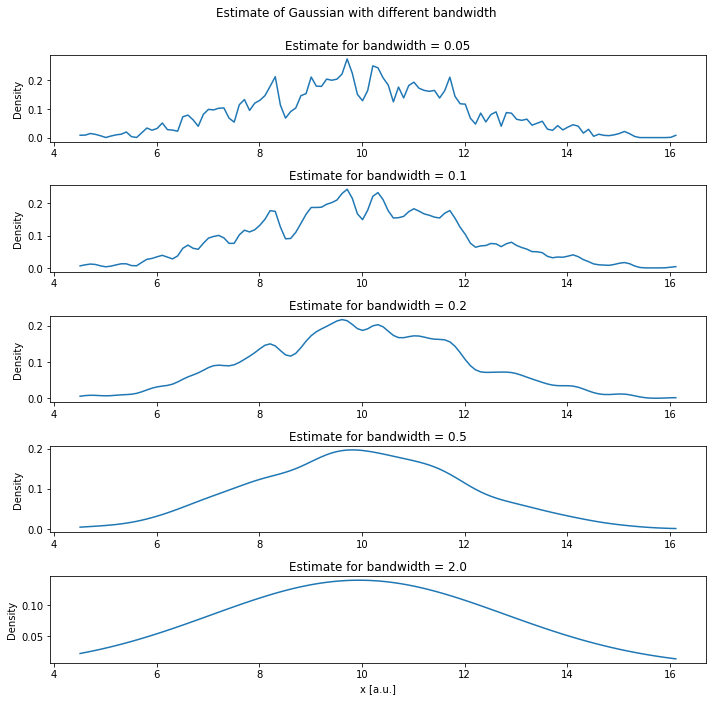

In [58]:
all_bandwidth = [0.05, 0.1, 0.2, 0.5, 2.0]

sample = np.random.normal(10, 2, 1000)
fig, axs = plt.subplots(len(all_bandwidth), figsize = (10, 10))

for bandwidth, ax in zip(all_bandwidth, axs):
    x = np.arange(np.min(sample), np.max(sample), 0.1)
    pdf = [kernel_density_estimator(x_val, sample, bandwidth) for x_val in x]
    ax.plot(x, pdf)
    ax.set_title(f"Estimate for bandwidth = {bandwidth}")
    ax.set_ylabel("Density")
    
plt.suptitle("Estimate of Gaussian with different bandwidth")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
ax.set_xlabel("x [a.u.]");

**Observation**

For the smaller bandwidth, the estimate is more spiky as it takes into account a smaller region than the estimate using a bigger bandwidth. However, the higher granularity also includes comes with the cost of more noise. Seeing these difference, it becomes clear how important it is to fit the hyperparameter of bandwidth as it is the balance between including enough information (ie., not smoothing away so much information as in the subfigure using bandwidth 2.0), but on the other hand using a bandwidth big enough to ignore small fluctuations (as included in bandwidth 0.1). 

### 3. Bootstrap Variance of t-Statistic

In [67]:
def analytical_var(n):
    """Return analytical variance of T-statistic."""
    return n/(n-2)

In [72]:
def t_test_statistic(n, sample, mu):
    """Return standard two-sided t-test statistic, slides p.22 (14)."""
    # TODO: is this std dev?
    return np.sqrt(n)/np.std(sample, ddof = 1)*(np.mean(sample)-mu)

In [73]:
def bootstrapped_var(sample, m_samples, mu):
    """Return bootstrapped variance."""
    n = len(sample)
    all_est_t = np.zeros(m_samples)
    
    for i in range(m_samples):
        subsample = np.random.choice(sample, size=n, replace=True) # by default, weight of 1/n assigned to each entry
        est_t = t_test_statistic(n, subsample, mu)
        all_est_t[i] = est_t

    var = 1/m_samples * np.sum((all_est_t - 1/m_samples * np.sum(all_est_t))**2)
    return var 

In [74]:
all_n = [10, 100, 1000]
all_m_samples = [10, 100, 1000]

mu = 10
var = 4
sample_size = 1000
sample = np.random.normal(mu, np.sqrt(var), sample_size)

In [75]:
print("T-statistics variance for parameter set:\n")
for m in all_m_samples:
    for n in all_n:
        sample = np.random.normal(mu, np.sqrt(var), n)
        var_est = bootstrapped_var(sample, m, mu)
        var_true = analytical_var(sample_size)
        print(f"n={n} and boostraps m={m}")
        print(f"true var: {var_true:.3f} and estimated: {var_est:.3f}\n")

T-statistics variance for parameter set:

n=10 and boostraps m=10
true var: 1.002 and estimated: 1.177

n=100 and boostraps m=10
true var: 1.002 and estimated: 0.710

n=1000 and boostraps m=10
true var: 1.002 and estimated: 0.709

n=10 and boostraps m=100
true var: 1.002 and estimated: 1.831

n=100 and boostraps m=100
true var: 1.002 and estimated: 0.778

n=1000 and boostraps m=100
true var: 1.002 and estimated: 1.189

n=10 and boostraps m=1000
true var: 1.002 and estimated: 1.213

n=100 and boostraps m=1000
true var: 1.002 and estimated: 1.000

n=1000 and boostraps m=1000
true var: 1.002 and estimated: 1.009



**Observations**

In general, the higher the $n$ (the total sample size), the more accurate the estimate of the bootstrap variance is. Furthermore, the higher the $m$ (ie. the number of bootstrap runs is), the more stable is the variance over all sample sizes. However, when the sample size is small (e.g., $n$ = 10), the number of bootstraps cannot improve the result. 